In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tools.hh_experiments_loading import load_tsp_results, load_exp, exp_progress_loader, exp_chronics_loader

In [2]:
tsp_problems = [
        "pla7397.tsp",
    ]
instances_optimums = {
        "pla7397.tsp":  23260728
    }

In [2]:
# load the results of first benchmark
all_processes, all_final_results = load_tsp_results("./dumps/1st benchmark/", exp_progress_loader)

Running BRISE without the API!
/media/sem/B54BE5B22C0D3FA81/TUD/Master/code/experiments/hh_experiments_loading.py:290: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/sem/mypyvenv/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
tsp_chronics, _ = load_tsp_results("dumps/1st benchmark/", exp_chronics_loader)

/media/sem/B54BE5B22C0D3FA81/TUD/Master/code/experiments/hh_experiments_loading.py:290: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/sem/mypyvenv/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [3]:
# Filter data, since basis is Code=2.4 on tsp instance pla7397.tsp
basis_processes = all_processes[(all_processes["Code"] == "2.4.") & (all_processes["TSP instance"] == "pla7397.tsp")]
basis_final_results = all_final_results[(all_final_results["Code"] == "2.4.") & (all_final_results["TSP instance"] == "pla7397.tsp")]

# define parameter values for the experiments from first bench (ignore warnings)
for df in [basis_processes, basis_final_results]:
    df["Window size"] = "80 %"
    df["Task time"] = "15 sec"
    df["Number of workers"] = 6
    df["FRAMAB C coefficient"] = "std"
    df["TPE split size"] = "30 %"
    df["Random sampling size"] = 96
    df["Warming-up solutions"] = "all"

/home/sem/mypyvenv/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/sem/mypyvenv/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/sem/mypyvenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

In [4]:
sns.set(context='talk', font_scale=0.9, rc={'figure.figsize':(20,9)})

# Learning granularity

In [11]:
# loading experiments
w_s_folder = "./dumps/2nd benchmark/window_size_and_task_time/"
w_s_files = os.listdir(w_s_folder)
uids = set((x[11:51] for x in w_s_files))
lg_progresses = pd.DataFrame()
lg_final_results = pd.DataFrame()

for id_ in uids:
    id_files = sorted(filter(lambda x: id_ in x, w_s_files), reverse=True) # reproducible results
    for repetition, f_n in enumerate(id_files):
        exp = load_exp(w_s_folder + f_n)
        progress = exp_progress_loader(exp)
        progress["Repetition"] = repetition
        progress["Window size"] = str(int(exp.description["Predictor"]["window size"] * 100)) + " %"
        progress["Task time"] = str(exp.description["TaskConfiguration"]["Scenario"]["Budget"]["Amount"]) + " sec"
        
        lg_progresses = lg_progresses.append(progress, sort=False)
        lg_final_results = lg_final_results.append(progress.iloc[-1], sort=False)

## Window size

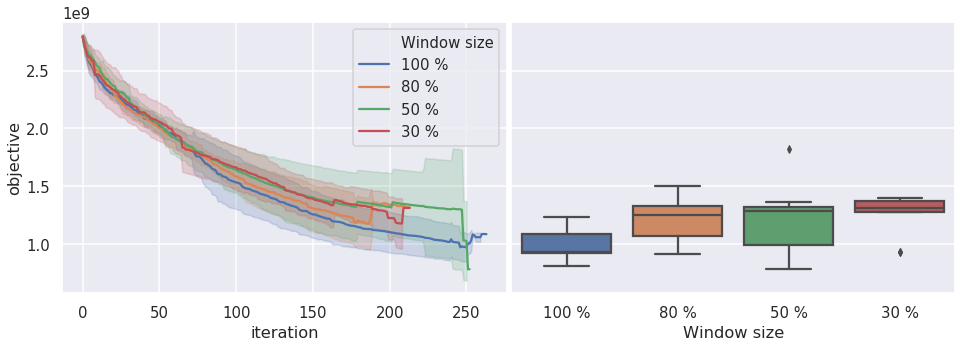

In [23]:
united_proc = basis_processes.append(lg_progresses[lg_progresses["Window size"] != "80 %"], sort=False)
united_final_result = basis_final_results.append(lg_final_results[lg_final_results["Window size"] != "80 %"], sort=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5), sharey=True, gridspec_kw={'wspace':0.01, 'hspace':0.01})

rplt = sns.lineplot(x="iteration", y='objective', ci='sd', hue="Window size", hue_order=["100 %","80 %", "50 %","30 %"],
                    # estimator=None, units="Repetition",
                    data=united_proc, ax=axes[0])

bplt = sns.boxplot(x="Window size", y='objective', order=["100 %","80 %", "50 %","30 %"], 
                   dodge=False, data=united_final_result, ax=axes[1])

bplt.set_ylabel('')
plt.savefig(fname="plots/2bench/window size plots.svg", dpi=500, bbox_inches='tight')
#plt.show()

## Task time

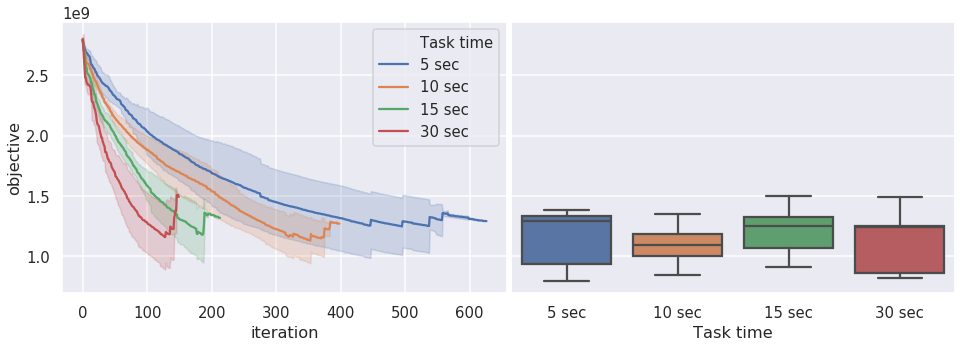

In [24]:
united_proc = basis_processes.append(lg_progresses[lg_progresses["Task time"] != "15 sec"], sort=False)
united_final_result = basis_final_results.append(lg_final_results[lg_final_results["Task time"] != "15 sec"], sort=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5), sharey=True, gridspec_kw={'wspace':0.01, 'hspace':0.01})

rplt = sns.lineplot(x="iteration", y='objective', ci='sd', hue="Task time", hue_order=["5 sec","10 sec", "15 sec","30 sec"],
                    #estimator=None, units="Repetition",
                    data=united_proc, ax=axes[0])

bplt = sns.boxplot(x="Task time",y='objective', order=["5 sec","10 sec", "15 sec","30 sec"],
                   dodge=False, data=united_final_result, ax=axes[1])
bplt.set_ylabel('')
plt.savefig(fname="plots/2bench/task time plots.svg", dpi=500)
#plt.show()

## Number of workers

In [16]:
w_folders = {
    3:  "./dumps/2nd benchmark/03_workers/",
    9:  "./dumps/2nd benchmark/09_workers/",
    12: "./dumps/2nd benchmark/12_workers/"
}

nr_wrkrs_progresses = pd.DataFrame()
nr_wrkrs_final_results = pd.DataFrame()

for nr_wrkrs, w_folder in w_folders.items():
    dump_files = sorted(os.listdir(w_folder), reverse=True) # reproducible results
    for repetition, f_n in enumerate(dump_files):
        exp = load_exp(w_folder + f_n)
        progress = exp_progress_loader(exp)
        progress["Repetition"] = repetition
        progress["Number of workers"] = nr_wrkrs
        nr_wrkrs_progresses = nr_wrkrs_progresses.append(progress, sort=False)
        nr_wrkrs_final_results = nr_wrkrs_final_results.append(progress.iloc[-1], sort=False)

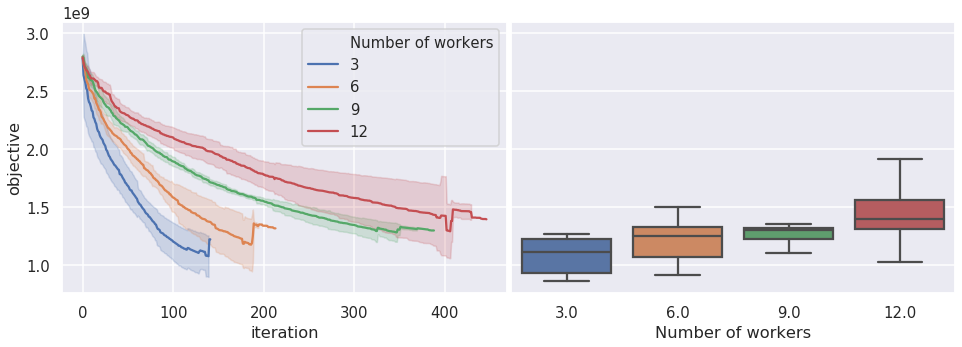

In [25]:
united_proc = basis_processes.append(nr_wrkrs_progresses, sort=False)
united_final_result = basis_final_results.append(nr_wrkrs_final_results, sort=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5), sharey=True, gridspec_kw={'wspace':0.01, 'hspace':0.01})

rplt = sns.lineplot(x="iteration", y='objective', ci='sd', hue="Number of workers",
                    palette=sns.color_palette()[:len(united_proc["Number of workers"].unique())],
                    #estimator=None, units="Repetition",
                    data=united_proc, ax=axes[0])

bplt = sns.boxplot(x="Number of workers", y='objective', dodge=False, data=united_final_result, ax=axes[1])

bplt.set_ylabel('')
plt.savefig(fname="plots/2bench/number of workers plots.svg", dpi=500)
#plt.show()

# Learning models configuration

In [21]:
lmc_folder = "dumps/2nd benchmark/learning models config/"
lmc_files = os.listdir(lmc_folder)
uids = set((x[11:51] for x in lmc_files))
lmc_progresses = pd.DataFrame()
lmc_chronics = pd.DataFrame()
lmc_final_results = pd.DataFrame()

for id_ in uids:
    id_files = sorted(filter(lambda x: id_ in x, lmc_files), reverse=True) # reproducible results
    for repetition, f_n in enumerate(id_files):
        exp = load_exp(lmc_folder + f_n)
        progress = exp_progress_loader(exp)
        progress["Repetition"] = repetition
        progress["FRAMAB C coefficient"] = exp.description["Predictor"]["models"][0]["Parameters"]["c"]
        progress["TPE split size"] = str(exp.description["Predictor"]["models"][1]["Parameters"]["top_n_percent"]) + " %"
        progress["Random sampling size"] = exp.description["Predictor"]["models"][1]["Parameters"]["SamplingSize"]
        
        lmc_progresses = lmc_progresses.append(progress, sort=False)
        lmc_final_results = lmc_final_results.append(progress.iloc[-1], sort=False)
        
        chronics = exp_chronics_loader(exp)
        chronics["Repetition"] = repetition
        chronics["FRAMAB C coefficient"] = exp.description["Predictor"]["models"][0]["Parameters"]["c"]
        chronics["TPE split size"] = str(exp.description["Predictor"]["models"][1]["Parameters"]["top_n_percent"]) + " %"
        chronics["Random sampling size"] = exp.description["Predictor"]["models"][1]["Parameters"]["SamplingSize"]
        lmc_chronics = lmc_chronics.append(chronics, sort=False)

/home/sem/mypyvenv/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



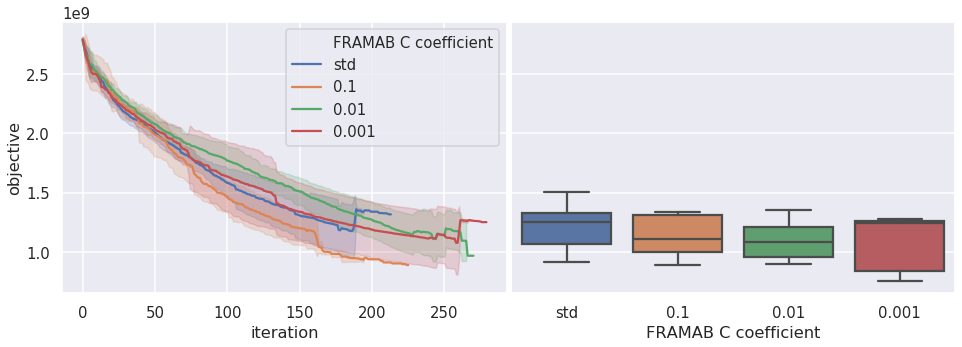

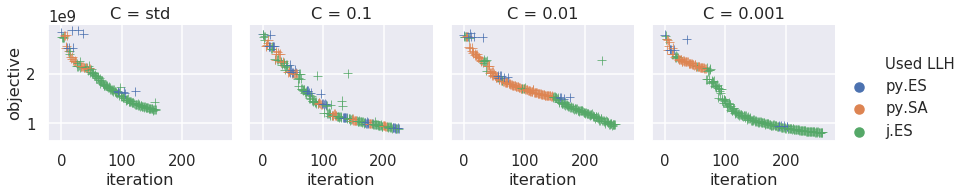

In [27]:
united_proc = basis_processes.append(lmc_progresses[lmc_progresses["FRAMAB C coefficient"] != "std"], sort=False)
united_final_result = basis_final_results.append(lmc_final_results[lmc_final_results["FRAMAB C coefficient"] != "std"], sort=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5), sharey=True, gridspec_kw={'wspace':0.01, 'hspace':0.01})

rplt = sns.lineplot(x="iteration", y='objective', ci='sd', hue="FRAMAB C coefficient", data=united_proc, ax=axes[0])

bplt = sns.boxplot(x="FRAMAB C coefficient", y='objective', dodge=False, data=united_final_result, ax=axes[1])
bplt.set_ylabel('')

plt.savefig(fname="plots/2bench/FRAMAB c plots.svg", dpi=500, bbox_inches='tight')
#plt.show()

llh_names = {
    "jMetalPy.EvolutionStrategy" : "py.ES",
    "jMetalPy.SimulatedAnnealing": "py.SA",
    "jMetal.EvolutionStrategy"   : "j.ES"
}
mab_c_chron = tsp_chronics[(tsp_chronics["Code"] == "2.4.") & (tsp_chronics["TSP instance"] == "pla7397.tsp")]
mab_c_chron["FRAMAB C coefficient"] = 'std' # baseline
mab_c_chron = mab_c_chron.append(lmc_chronics[lmc_chronics["FRAMAB C coefficient"] != "std"], sort=False)
mab_c_chron = mab_c_chron[mab_c_chron["Repetition"] == 4]
mab_c_chron["Used LLH"] = mab_c_chron["low level heuristic"].apply(lambda x: llh_names[x])
mab_c_chron = mab_c_chron.rename(columns={'FRAMAB C coefficient': 'C'})

prog_plot = sns.relplot(x="iteration", y='objective', col="C", marker="+", hue="Used LLH", hue_order=["py.ES", "py.SA", "j.ES"], 
                        data=mab_c_chron, height=3, aspect=1)

plt.savefig(fname="plots/2bench/FRAMAB c plots chonics.svg", dpi=500, bbox_inches='tight')
#plt.show()

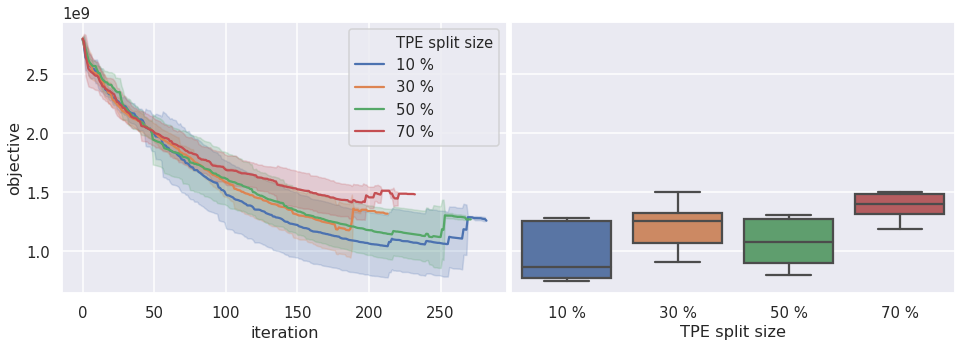

In [29]:
united_proc = basis_processes.append(lmc_progresses[lmc_progresses["TPE split size"] != "30 %"], sort=False)
united_final_result = basis_final_results.append(lmc_final_results[lmc_final_results["TPE split size"] != "30 %"], sort=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5), sharey=True, gridspec_kw={'wspace':0.01, 'hspace':0.01})

rplt = sns.lineplot(x="iteration", y='objective', ci='sd', hue="TPE split size", hue_order=["10 %","30 %", "50 %","70 %"],
                    data=united_proc, ax=axes[0])

bplt = sns.boxplot(x="TPE split size", y='objective', order=["10 %","30 %", "50 %","70 %"],
                   dodge=False, data=united_final_result, ax=axes[1])
bplt.set_ylabel('')

plt.savefig(fname="plots/2bench/TPE split size plots.svg", dpi=500, bbox_inches='tight')
#plt.show()

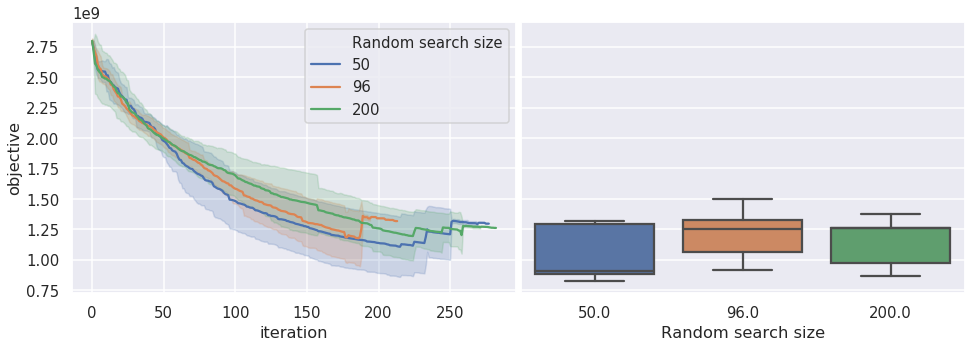

In [37]:
united_proc = basis_processes.append(lmc_progresses[lmc_progresses["Random sampling size"] != 96], sort=False)
united_final_result = basis_final_results.append(lmc_final_results[lmc_final_results["Random sampling size"] != 96], sort=False)

united_proc = united_proc.rename(columns={"Random sampling size": "Random search size"})
united_final_result = united_final_result.rename(columns={"Random sampling size": "Random search size"})

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5), sharey=True, gridspec_kw={'wspace':0.01, 'hspace':0.01})
rplt = sns.lineplot(x="iteration", y='objective', ci='sd', hue="Random search size",
                    palette=sns.color_palette()[:len(united_proc["Random search size"].unique())],
                    data=united_proc, ax=axes[0])

bplt = sns.boxplot(x="Random search size", y='objective', dodge=False, data=united_final_result, ax=axes[1])

bplt.set_ylabel('')
plt.savefig(fname="plots/2bench/Random search size.svg", dpi=500, bbox_inches='tight')
#plt.show()

# Warming-up solutions

In [34]:
o_s_exp_dumps_dir = "dumps/2nd benchmark/one_solution/"
o_s_exp_dumps_files = sorted(os.listdir(o_s_exp_dumps_dir), reverse=True) # reproducible results

one_sol_processes = pd.DataFrame()
one_sol_final_results = pd.DataFrame()

for repetition, f_n in enumerate(o_s_exp_dumps_files):
    exp = load_exp(o_s_exp_dumps_dir + f_n)
    progress = exp_progress_loader(exp)
    progress["Repetition"] = repetition
    progress["Warming-up solutions"] = "one"
    one_sol_processes = one_sol_processes.append(progress, sort=False)
    one_sol_final_results = one_sol_final_results.append(progress.iloc[-1], sort=False)

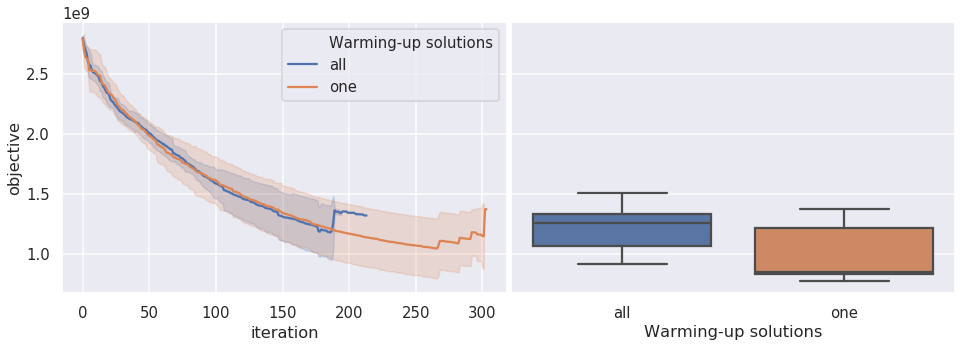

In [36]:
united_proc = basis_processes.append(one_sol_processes, sort=False)
united_final_result = basis_final_results.append(one_sol_final_results, sort=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5), sharey=True, gridspec_kw={'wspace':0.01, 'hspace':0.01})

rplt = sns.lineplot(x="iteration", y='objective', ci='sd', hue="Warming-up solutions", data=united_proc, ax=axes[0])
bplt = sns.boxplot(x="Warming-up solutions", y='objective', dodge=False, data=united_final_result, ax=axes[1])
bplt.set_ylabel('')
plt.savefig(fname="plots/2bench/warming-up solutions plots.svg", dpi=500)
#plt.show()